<a href="https://colab.research.google.com/github/Siddhant254/CNN/blob/main/Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case 1 : Input = 1 and Output = 2

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model # Functional   API
from keras.models import Sequential # Sequential API
from keras.layers import * # All layers

In [2]:
# Input = 1
x = Input(shape=(3,))

# Hidden Layer 1
hidden1 = Dense(64 , activation='relu')(x)

# Hidden Layer 2
hidden2 = Dense(64 , activation='relu')(hidden1)

# Hidden Layer 3
hidden3 = Dense(64 , activation='relu')(hidden2)

# First Output
output1 = Dense(1 , activation='linear')(hidden3)

# Second Output
output2 = Dense(1 , activation='sigmoid')(hidden3 )

In [3]:
model = Model(inputs=x , outputs=[output1,output2])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 64)                   256       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 64)                   4160      ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 64)                   4160      ['dense_1[0][0]']             
                                                                                              

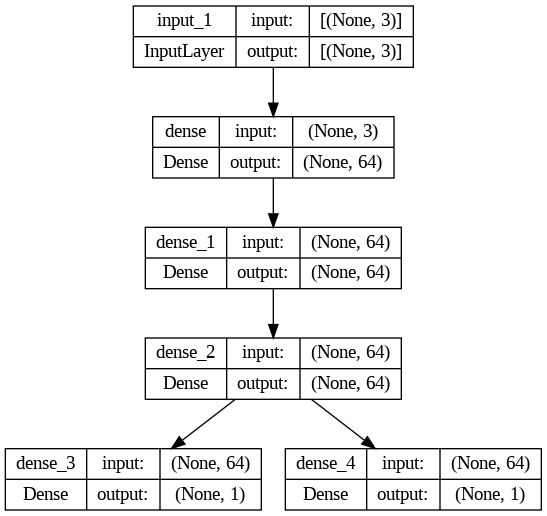

In [5]:
from keras.utils import plot_model
plot_model(model , show_shapes=True)

# Case 2 : Input = 3 , Output = 1

In [3]:
input1 = Input(shape=(32,))
input2 = Input(shape=(64,))
input3 = Input(shape=(128,))

In [4]:
# The first branch operates on the first input dataset
# Input1 connected with 3 hidden layers
x = Dense(64 , activation='relu')(input1)
x1 = Dense(128 , activation='relu')(x)
x2 = Dense(32 , activation='relu')(x1)

In [5]:
# The second branch operates on the second input dataset
# Input2 connected with 2 hidden layers
y = Dense(64 , activation='relu')(input2)
y1 = Dense(128 , activation='relu')(y)

In [6]:
# The third branch operates on the third input dataset
# Input2 connected with 4 hidden layers
z = Dense(64 , activation='relu')(input3)
z1 = Dense(128 , activation='relu')(z)
z2 = Dense(32 , activation='relu')(z1)
z3 = Dense(64 , activation='relu')(z2)

In [7]:
# Combine the output of three branches
combined = concatenate([x2 , y1 , z3])

In [8]:
# Now , apply a FC Layer and then a regression prediction on the combined output
m = Dense(32 , activation='relu')(combined)
m1 = Dense(1 , activation='linear')(m)

In [9]:
# Connect with Functional API
model = Model(inputs=[input1,input2,input3] , outputs=m1)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 64)                   8256      ['input_3[0][0]']             
                                                                                                  
 dense (Dense)               (None, 64)                   2112      ['input_1[0][0]']             
                                                                                              

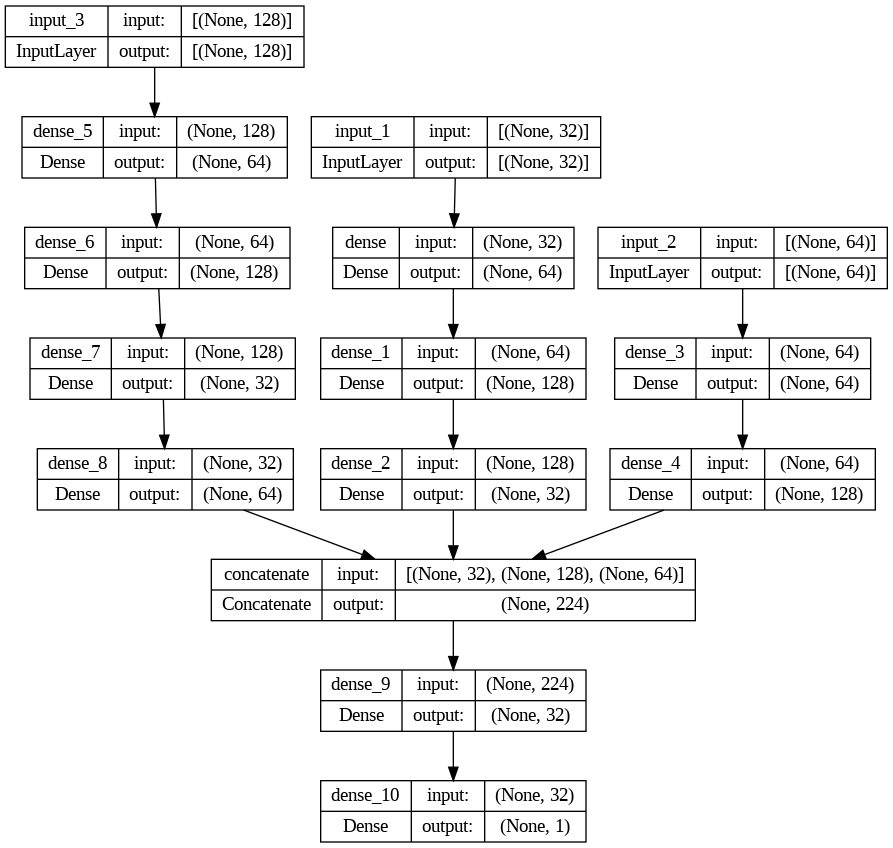

In [10]:
from keras.utils import plot_model
plot_model(model , show_shapes=True)